In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [4]:
import os
print(os.getcwd())


d:\24fall\lent term\Project2\MusicStreamingSubscriptionsChurnPredictor\churn_prediction\notebooks


In [ ]:
import os
import pandas as pd
import numpy as np
import lightgbm as lgb
import joblib

from sklearn.model_selection import train_test_split

import shap
import warnings
warnings.filterwarnings("ignore")

from src.data.preprocess import data_preprocessing
from src.data.resample import data_resampling
from src.model.glm import train_glm
from src.model.lgbm import train_lgbm 
from src.training.evaluate import evaluate_model



In [7]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
labeled_path = os.path.join(parent_dir, "data", "data_final","labeled_data.csv")
labeled_data = pd.read_csv(labeled_path)

X_labled, y, scaler, fitted_label_encoders = data_preprocessing(labeled_data, is_train=True, scaler=None, label_encoders=None)

X_train, X_test, y_train, y_test = train_test_split(
    X_labled, y, test_size=0.2, random_state=42, stratify=y)

X_train_resampled, y_train_resampled = data_resampling(X_train, y_train)

In [8]:
glm_model = train_glm(X_train, y_train)
y_pred, y_prob = evaluate_model(glm_model, X_test, y_test, model_name="GLM")


GLM Evaluation Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89    176726
           1       0.31      0.86      0.46     17466

    accuracy                           0.82    194192
   macro avg       0.65      0.83      0.67    194192
weighted avg       0.92      0.82      0.85    194192

GLM AUC: 0.9101


In [9]:
lgbm_model = train_lgbm(X_train, y_train)
y_pred, y_prob = evaluate_model(lgbm_model, X_test, y_test, model_name="GLM")

[LightGBM] [Info] Number of positive: 706904, number of negative: 706904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.251753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17207
[LightGBM] [Info] Number of data points in the train set: 1413808, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

GLM Evaluation Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    176726
           1       0.71      0.63      0.67     17466

    accuracy                           0.94    194192
   macro avg       0.84      0.80      0.82    194192
weighted avg       0.94      0.94      0.94    194192

GLM AUC: 0.9530


In [25]:
feature_names=['transaction_count', 'is_auto_renew_change_flag',
       'average_plan', 'change_in_method', 'change_in_plan', 'sum_plan_days',
       'average_amount_paid', 'average_amount_charged', 'difference',
       'change_in_price', 'change_in_price_paid', 'sum_list_price',
       'sum_amount_paid', 'duration', 'more_than_30', 'autorenew_not_cancel',
       'sum_month_25_previous', 'sum_month_50_previous',
       'sum_month_75_previous', 'sum_month_985_previous',
       'sum_month_100_previous', 'mean_month_25_previous',
       'mean_month_50_previous', 'mean_month_75_previous',
       'mean_month_985_previous', 'mean_month_100_previous',
       'mean_month_num_unq_previous', 'sum_month_num_unq_previous',
       'sum_month_total_secs_previous', 'mean_month_total_secs_previous',
       'month_login_previous',
       'sum_month_25_current', 'sum_month_50_current', 'sum_month_75_current',
       'sum_month_985_current', 'sum_month_100_current',
       'mean_month_25_current', 'mean_month_50_current',
       'mean_month_75_current', 'mean_month_985_current',
       'mean_month_100_current', 'mean_month_num_unq_current',
       'sum_month_num_unq_current', 'sum_month_total_secs_current',
       'mean_month_total_secs_current', 'month_login_current',
        'diff_sum_month_25', 'diff_sum_month_50',
       'diff_sum_month_75', 'diff_sum_month_985', 'diff_sum_month_100',
       'diff_mean_month_25', 'diff_mean_month_50', 'diff_mean_month_75',
       'diff_mean_month_985', 'diff_mean_month_100', 'diff_mean_month_num_unq',
       'diff_sum_month_num_unq', 'diff_sum_month_total_secs',
       'diff_mean_month_total_secs', 'diff_month_login', 'city', 'bd',
       'gender', 'registered_via', 'registration_duration_days', 'days_until_month_end', 'last_login_interval']

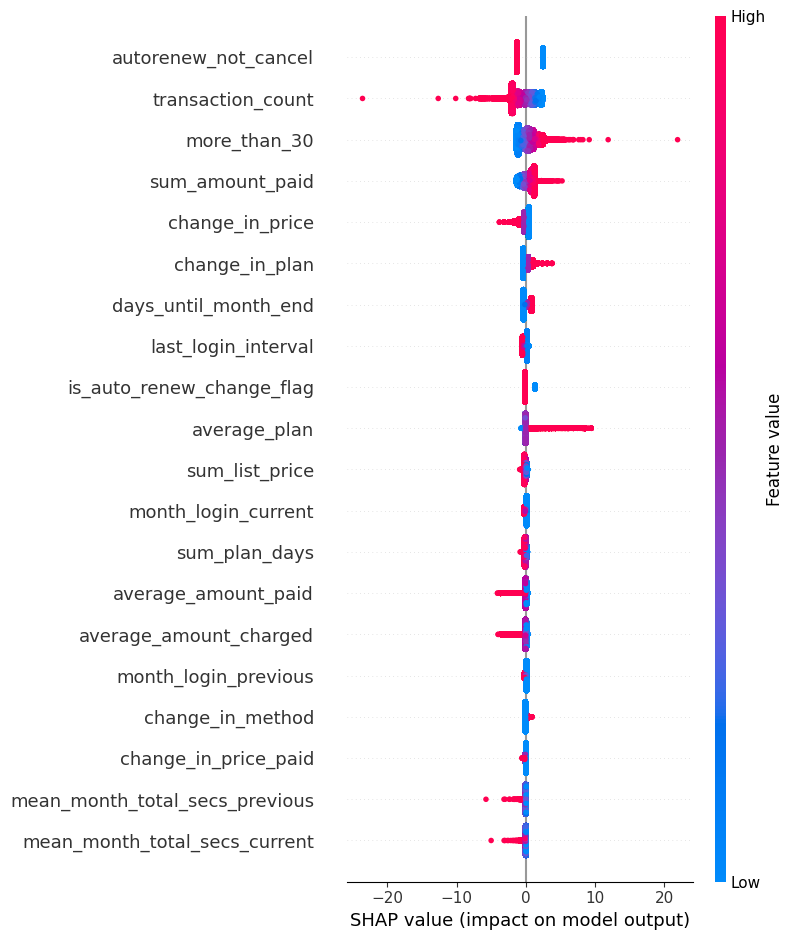

In [26]:
explainer = shap.LinearExplainer(glm_model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [ ]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

glm_model_path = os.path.join(parent_dir, "models","glm_model.pkl")
joblib.dump(glm_model, glm_model_path)
print("Model parameters saved as 'glm_model.pkl'")

lgbm_model_path = os.path.join(parent_dir, "models","lgbm_model.pkl")
joblib.dump(lgbm_model, lgbm_model_path)
print("Model parameters saved as 'lgbm_model.pkl'")

Model parameters saved as 'glm_model.pkl'
Model parameters saved as 'lgbm_model.pkl'
